In [1]:
import numpy as np 
import pandas as pd 
from collections import Counter
import matplotlib.pyplot as plt

This code reveals the most and least common drawn numbers in the Texas Lotto (after a specified year).

In [ ]:
# base dataset 
lotto = pd.read_csv('lottotexas.csv')
lotto.tail() 

In [3]:
# Adding column headings
lotto.columns = ['Game Name', 'Month', 'Day', 'Year', 'Num1', 'Num2', 'Num3', 'Num4', 'Num5', 'Num6']

# Removing the first column since it is repeated ('Game Name')
lotto_clean = lotto.drop(columns=['Game Name'])

# Filter by year (optional)
filtered_df = lotto_clean[lotto_clean['Year'] >= 2006]

# Combine Num1 to Num6 into a single column 'Winning Numbers'
filtered_df['Winning Numbers'] = filtered_df[['Num1', 'Num2', 'Num3', 'Num4', 'Num5', 'Num6']].values.tolist()

# Drop the individual Num1 to Num6 columns
filtered_df = filtered_df.drop(columns=['Num1', 'Num2', 'Num3', 'Num4', 'Num5', 'Num6'])

# Displaying the updated DataFrame
print(filtered_df)

      Month  Day  Year           Winning Numbers
1370      1    4  2006   [32, 15, 44, 21, 35, 3]
1371      1    7  2006    [11, 9, 14, 7, 27, 11]
1372      1   11  2006   [18, 36, 6, 10, 44, 24]
1373      1   14  2006    [30, 22, 41, 5, 32, 3]
1374      1   18  2006    [2, 10, 23, 9, 36, 16]
...     ...  ...   ...                       ...
3351     11   15  2023   [30, 19, 17, 26, 31, 4]
3352     11   18  2023   [21, 16, 30, 46, 45, 5]
3353     11   20  2023  [21, 35, 16, 39, 51, 48]
3354     11   22  2023   [52, 21, 16, 3, 29, 14]
3355     11   25  2023    [13, 30, 21, 16, 9, 8]

[1986 rows x 4 columns]


/var/folders/f6/nfgb52n924526xwpfkgqpsc40000gn/T/ipykernel_5896/1362996517.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Winning Numbers'] = filtered_df[['Num1', 'Num2', 'Num3', 'Num4', 'Num5', 'Num6']].values.tolist()


In [ ]:
# Count occurrences of each number
number_counts = Counter(numbers_rolled)

# Sort the counts by the number in descending order
sorted_counts = sorted(number_counts.items(), key=lambda x: x[0], reverse=False)

# Displaying the counts in ascending order
for number, count in sorted_counts:
    print(f"Number Rolled: {number}, Count: {count}")


In [130]:
# Sort the counts in descending order
sorted_top_counts = sorted(number_counts.items(), key=lambda x: x[1], reverse=True) 

# Displaying the top 6 highest counts 
for number, count in sorted_top_counts[:6]:     
    print(f"Number Rolled: {number}, Count: {count}")


Number Rolled: 8, Count: 256
Number Rolled: 26, Count: 249
Number Rolled: 31, Count: 247
Number Rolled: 4, Count: 246
Number Rolled: 21, Count: 243
Number Rolled: 19, Count: 243


In [131]:
# Displaying the least 6 common counts 
for number, count in sorted_top_counts[-6:]:
    print(f"Number Rolled: {number}, Count: {count}")


Number Rolled: 47, Count: 198
Number Rolled: 11, Count: 196
Number Rolled: 50, Count: 193
Number Rolled: 48, Count: 193
Number Rolled: 33, Count: 191
Number Rolled: 45, Count: 180


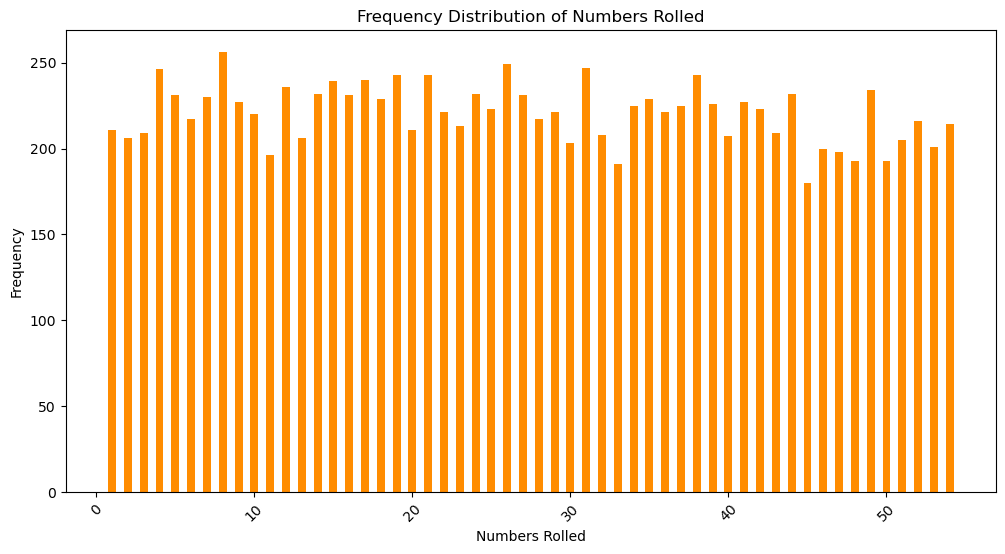

In [132]:
# Extract numbers and counts
numbers = list(number_counts.keys())
counts = list(number_counts.values())

# Set the figure size
plt.figure(figsize=(12, 6))

# Plotting bar chart
plt.bar(numbers, counts, color='darkorange', alpha=1, width=0.5)
plt.xticks(rotation=45)
plt.xlabel('Numbers Rolled')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Numbers Rolled')
plt.show()



Model predictions 

Hypothesis: If the numbers are truly random, the model's accuracy will be be close to 50%, indicating that it's not performing much better than random chance. 


In [152]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = filtered_df['Winning Numbers'].shift(1).dropna()  # Shift the winning numbers to represent the past
y = filtered_df['Winning Numbers'].dropna()          # Target variable is the actual winning numbers

In [ ]:
from sklearn.metrics import accuracy_score

# Assuming y_test contains the true labels and predictions contains the predicted labels
accuracy = accuracy_score(y_test, predictions)
print(f"Model Accuracy: {accuracy}")

# Calculate accuracy for random guessing (assuming two classes)
random_accuracy = 0.5
print(f"Random Guessing Accuracy: {random_accuracy}")
